<a href="https://colab.research.google.com/github/EduardoGallego94/Data_Salaries/blob/main/Salarios_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Science, AI & ML Job Salaries in 2025
https://www.kaggle.com/datasets/adilshamim8/salaries-for-data-science-jobs

##1 - Objetivo
Analizar tendencias de salarios por paises, tipos de trabajos en data y situación del trabajo remoto.

##2 - Exploración

- Análisis de variables y observaciones
- Análisis tipo de datos
- Duplicidad de observaciones: Tras análisis, concluyo que no estamos ante un dataset de eventos únicos por lo que no es correcto eliminar duplicados.
- No hay valores nulos.
- Distribuciones de variables clave.
- Algunas comparaciones de salarios y penetración del trabajo remoto Es Vs resto del mundo.

In [116]:
# Importo librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [117]:
# Monto mi drive en colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [118]:
# guardamos el dataset en la variable 'df'
ruta = '/content/drive/MyDrive/PROYECTOS/Data_Salaries/dataset/salaries.csv'
df = pd.read_csv(ruta)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136757 entries, 0 to 136756
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   work_year           136757 non-null  int64 
 1   experience_level    136757 non-null  object
 2   employment_type     136757 non-null  object
 3   job_title           136757 non-null  object
 4   salary              136757 non-null  int64 
 5   salary_currency     136757 non-null  object
 6   salary_in_usd       136757 non-null  int64 
 7   employee_residence  136757 non-null  object
 8   remote_ratio        136757 non-null  int64 
 9   company_location    136757 non-null  object
 10  company_size        136757 non-null  object
dtypes: int64(4), object(7)
memory usage: 11.5+ MB


In [120]:
# Vemos una muestra aleatoria de 10 registros
df.sample(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
51900,2025,MI,FT,Research Associate,35116,GBP,44450,GB,0,GB,M
44976,2025,MI,FT,Analyst,78540,USD,78540,US,0,US,M
13786,2025,MI,FT,Engineer,38000,GBP,48101,GB,0,GB,M
36144,2025,SE,FT,Machine Learning Engineer,180000,USD,180000,US,100,US,M
71925,2024,SE,FT,Data Analyst,177000,USD,177000,US,0,US,M
93030,2024,EN,FT,Analyst,106000,USD,106000,US,0,US,M
62427,2025,SE,FT,DevOps Engineer,94500,USD,94500,US,0,US,M
70885,2024,SE,FT,Data Engineer,156000,USD,156000,US,0,US,M
47872,2025,SE,FT,Data Scientist,110000,USD,110000,US,0,US,M
65591,2024,EN,FT,Research Engineer,178200,USD,178200,US,0,US,M


###Duplicidad de datos

In [121]:
# Comprobamos valores duplicados
print(df.duplicated().sum())

70694


Hay 70694 registros duplicados

In [122]:
#Vamos a aislar un ejemplo de un grupo de registros duplicados
df_dupes = df[df.duplicated(keep=False)]
dupe_groups = df_dupes.groupby(list(df.columns)).size().reset_index(name='count')
first_duplicate_group = dupe_groups[dupe_groups['count'] > 1].iloc[0]

example = df_dupes
for col in df.columns:
    example = example[example[col] == first_duplicate_group[col]]

example


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
136604,2021,EN,FT,Data Scientist,90000,USD,90000,US,100,US,S
136679,2021,EN,FT,Data Scientist,90000,USD,90000,US,100,US,S


In [123]:
#ordenamos por los registros que más se repiten
dupe_groups.sort_values('count', ascending=False)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,count
17507,2025,SE,FT,Data Scientist,160000,USD,160000,US,100,US,M,194
17348,2025,SE,FT,Data Scientist,110000,USD,110000,US,100,US,M,186
8105,2024,SE,FT,Data Scientist,160000,USD,160000,US,100,US,M,182
7910,2024,SE,FT,Data Scientist,110000,USD,110000,US,100,US,M,168
9462,2024,SE,FT,Machine Learning Researcher,160000,USD,160000,US,100,US,M,161
...,...,...,...,...,...,...,...,...,...,...,...,...
11,2022,EX,FT,Data Engineer,310000,USD,310000,US,100,US,M,2
10,2022,EX,FT,Data Engineer,239000,USD,239000,US,100,US,M,2
9,2022,EN,FT,Data Scientist,180000,USD,180000,US,100,US,M,2
8,2022,EN,FT,Data Scientist,100000,USD,100000,US,100,US,M,2


En este punto nos preguntamos: ¿estos registros duplicados son errores o son datos que se repiten en la realidad? ¿Conviene en este caso eliminar los registros duplicados?

Es verosimil que haya muchos trabajadores con las mismas condiciones y el mismo puesto por lo que en este caso no vamos a eliminar duplicados.

Es decir, no estamos ante un dataset de eventos únicos por lo que no es correcto eliminar duplicados.

###Algunas visualizaciones

<Axes: xlabel='salary_in_usd', ylabel='Count'>

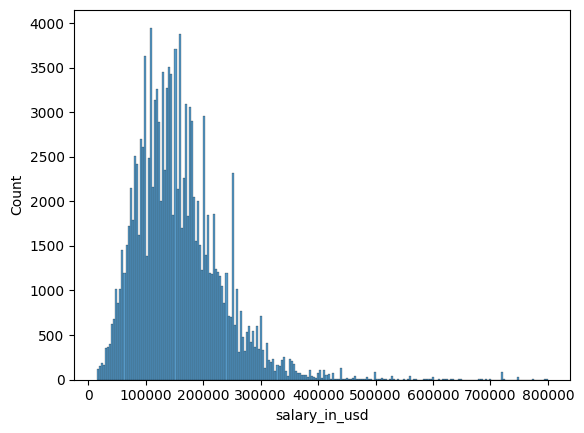

In [124]:
#Distribución por salario en usd
sns.histplot(df['salary_in_usd'])

Text(0, 0.5, '')

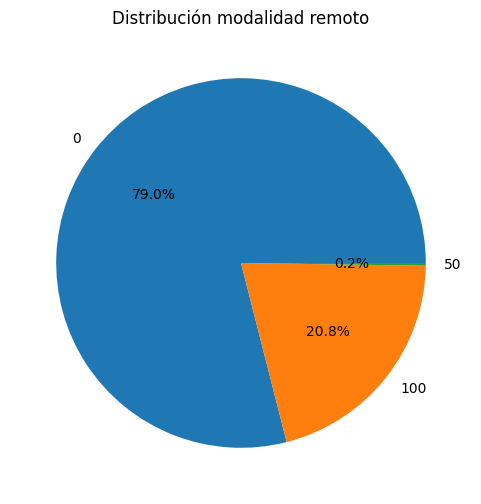

In [125]:
#Distribución modalidad remoto
df['remote_ratio'].value_counts().plot.pie(
    autopct='%1.1f%%',
    figsize=(6, 6),
    title='Distribución modalidad remoto'
)
plt.ylabel('')  # opcional: elimina la etiqueta del eje Y

Text(0, 0.5, '')

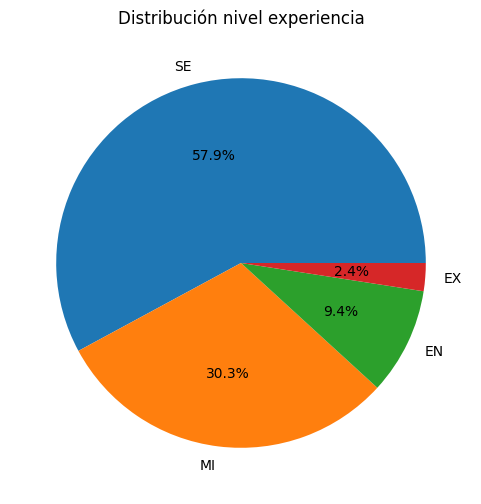

In [126]:
df['experience_level'].value_counts().plot.pie(
    autopct='%1.1f%%',
    figsize=(6, 6),
    title='Distribución nivel experiencia'
)
plt.ylabel('')  # opcional: elimina la etiqueta del eje Y

Text(0, 0.5, '')

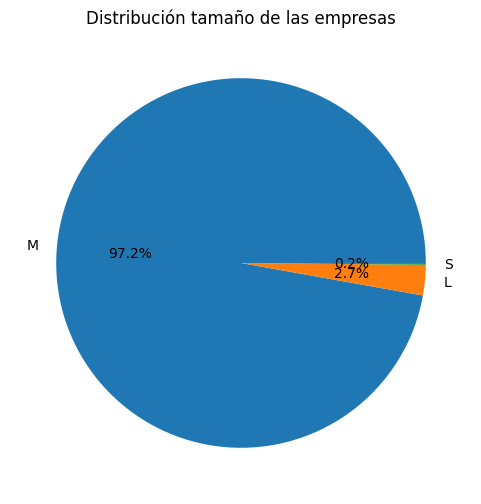

In [127]:
#Distribución tamaño de la empresa
df['company_size'].value_counts().plot.pie(
    autopct='%1.1f%%',
    figsize=(6, 6),
    title='Distribución tamaño de las empresas'
)
plt.ylabel('')  # opcional: elimina la etiqueta del eje Y

In [128]:
#Lista de paises incluidos en el estudio
df['company_location'].unique()

array(['US', 'CA', 'AT', 'LV', 'GB', 'PT', 'FI', 'AU', 'NZ', 'SK', 'IE',
       'ES', 'DE', 'NL', 'PL', 'FR', 'BR', 'ZA', 'AR', 'CO', 'MX', 'UA',
       'CH', 'LT', 'PH', 'BE', 'TH', 'JM', 'JP', 'MT', 'MK', 'SI', 'HK',
       'LS', 'IN', 'PE', 'SG', 'IT', 'HU', 'RO', 'PA', 'EE', 'LU', 'DZ',
       'EG', 'CL', 'GR', 'KE', 'CD', 'SE', 'KR', 'TW', 'NO', 'CZ', 'TR',
       'CY', 'DK', 'AE', 'BG', 'ID', 'JO', 'RS', 'PR', 'SV', 'EC', 'DO',
       'MY', 'XK', 'CR', 'ZM', 'AM', 'IL', 'LB', 'NG', 'HR', 'PK', 'HN',
       'VE', 'AS', 'SA', 'OM', 'BA', 'VN', 'GI', 'MU', 'RU', 'QA', 'GH',
       'AD', 'CF', 'IR', 'BS', 'IQ', 'CN', 'MD'], dtype=object)

<Axes: xlabel='salary_in_usd', ylabel='Count'>

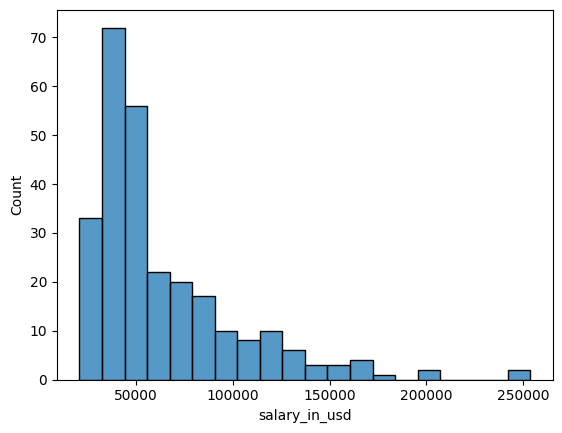

In [129]:
#Grafico con los salarios de España
df_es = df[df['company_location'] == 'ES']
sns.histplot(df_es['salary_in_usd'])

Text(0, 0.5, '')

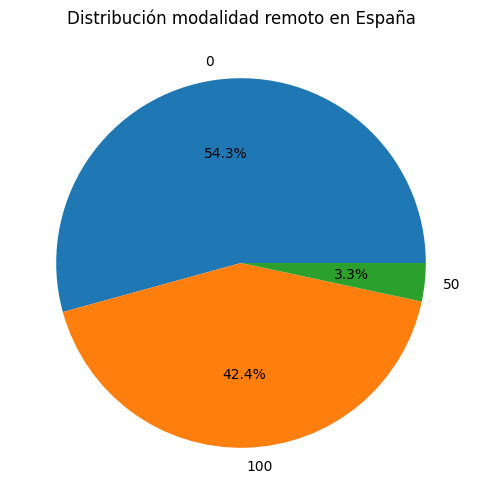

In [130]:
#Modalidad remoto en España
df_es['remote_ratio'].value_counts().plot.pie(
    autopct='%1.1f%%',
    figsize=(6, 6),
    title='Distribución modalidad remoto en España'
)
plt.ylabel('')

Parece que en España, aunque los salarios son significativamente más bajos (como era de esperar), la penetración del trabajo remoto es mayor. Solo el 54% es 100% presencial frente al 79% del dataset completo.

##3 - Limpieza
- Compruebo que no hay valores nulos
- Transformación de variables categoricas
  - Label encoding (menos de 5 posibles valores)
  - One Hot Encoding (más de 5 posibles valores)

###Valores nulos

In [131]:
# Comprobamos valores nulos
df.isnull().sum()

,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0
company_location,0


###Transformación de variables
Codificamos variables categoricas para poder hacer regresiones

In [132]:
#1.-Label Encoding
orden_experiencia = {'EN': 0, 'MI': 1, 'SE': 2, 'EX': 3}
df['experience_level_num'] = df['experience_level'].map(orden_experiencia)

orden_tamanho = {'S': 0, 'M': 1, 'L': 2}
df['company_size_num'] = df['company_size'].map(orden_tamanho)

df['remote_ratio_num'] = df['remote_ratio'].map({0: 0, 50: 1, 100: 2})

In [133]:
# Para one hot encoding con top N categorías:
# De momento comento esta celda ya que voy a usar la función definida en la sigueiente celda
"""
def codificar_top_n(df, columna, n=5): # Usa como base la primera por orden alfabético del top-N

    #Agrupa las categorías menos frecuentes como 'otros' y aplica one-hot encoding a las top N.

    top_n = df[columna].value_counts().nlargest(n).index
    print('base: ' + )
    nueva_col = columna + '_agrupada'

    # Crear nueva columna con top N y 'otros'
    df[nueva_col] = df[columna].apply(lambda x: x if x in top_n else 'otros')

    # One-hot encoding de la columna agrupada
    dummies = pd.get_dummies(df[nueva_col], prefix=columna, drop_first=True)

    # Añadir al df original
    df = pd.concat([df, dummies], axis=1)

    return df
  """

"\ndef codificar_top_n(df, columna, n=5): # Usa como base la primera por orden alfabético del top-N\n    \n    #Agrupa las categorías menos frecuentes como 'otros' y aplica one-hot encoding a las top N.\n    \n    top_n = df[columna].value_counts().nlargest(n).index\n    print('base: ' + )\n    nueva_col = columna + '_agrupada'\n\n    # Crear nueva columna con top N y 'otros'\n    df[nueva_col] = df[columna].apply(lambda x: x if x in top_n else 'otros')\n\n    # One-hot encoding de la columna agrupada\n    dummies = pd.get_dummies(df[nueva_col], prefix=columna, drop_first=True)\n\n    # Añadir al df original\n    df = pd.concat([df, dummies], axis=1)\n\n    return df\n  "

In [134]:
def codificar_top_n_base_otros(df, columna, n=5):
    """
    Agrupa las categorías menos frecuentes como 'otros' y aplica one-hot encoding a las top N,
    usando 'otros' como categoría base (es decir, no se codifica).
    """
    top_n = df[columna].value_counts().nlargest(n).index
    nueva_col = columna + '_agrupada'
    print(top_n)
    # Crear nueva columna con top N y 'otros'
    df[nueva_col] = df[columna].apply(lambda x: x if x in top_n else 'otros')

    # One-hot encoding sin eliminar ninguna (drop_first=False)
    dummies = pd.get_dummies(df[nueva_col], drop_first=False)

    # Eliminar la columna 'otros' para usarla como base en la regresión
    col_otros = f"{columna}_otros"
    if col_otros in dummies.columns:
        dummies.drop(columns=[col_otros], inplace=True)

    # Añadir dummies al df original
    df = pd.concat([df, dummies], axis=1)

    return df


In [135]:
#2.-One-Hot Encoding (codificación binaria)
df = codificar_top_n_base_otros(df, 'job_title', n=5)
df = codificar_top_n_base_otros(df, 'employee_residence', n=5)

Index(['Data Scientist', 'Software Engineer', 'Data Engineer', 'Data Analyst',
       'Engineer'],
      dtype='object', name='job_title')
Index(['US', 'CA', 'GB', 'AU', 'NL'], dtype='object', name='employee_residence')


In [136]:
columnas_dummies = ['Data Scientist', 'Software Engineer', 'Data Engineer', 'Data Analyst', 'Engineer', 'US', 'CA', 'GB', 'AU', 'NL']

##4 - Análisis
- Comparación España Vs Resto del mundo

- Efecto de la experiencia en el salario

- ¿Se gana más trabajando en remoto?

- ¿Qué diferencias hay entre roles (Data Analyst, Data Scientist, ML Engineer, etc.)?

¿Se gana lo mismo en España que en otros países del mundo en trabajos de ciencia de datos?

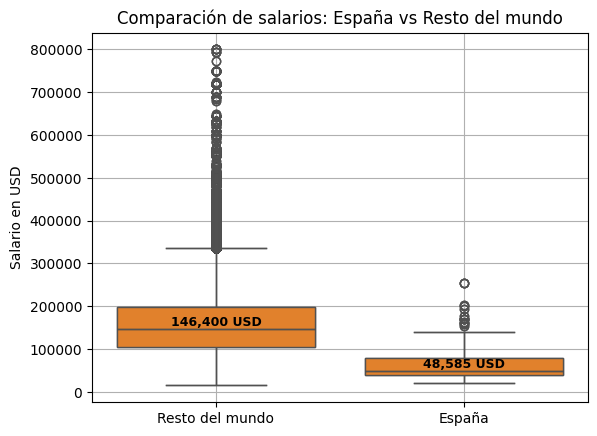

In [137]:
# Crear columna categórica: España vs Resto
df['es_espana'] = df['employee_residence'].apply(lambda x: 'España' if x == 'ES' else 'Resto del mundo')

# Visualizar distribución salarial
ax = sns.boxplot(data=df, x='es_espana', y='salary_in_usd')
sns.boxplot(data=df, x='es_espana', y='salary_in_usd')
plt.title('Comparación de salarios: España vs Resto del mundo')
plt.xlabel('')
plt.ylabel('Salario en USD')
plt.grid(True)

#Añadir valores en la gráfica
for i, categoria in enumerate(df['es_espana'].unique()):
    mediana = df[df['es_espana'] == categoria]['salary_in_usd'].median()
    ax.text(i, mediana, f'{mediana:,.0f} USD',
            ha='center', va='bottom', fontsize=9, fontweight='bold', color='black')


¿y en USA?

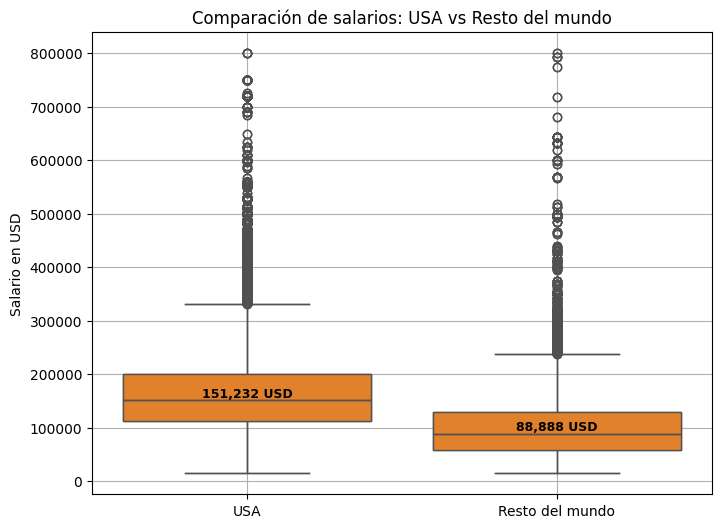

In [138]:
# Crear columna categórica: USA vs Resto
df['resto_usa'] = df['employee_residence'].apply(lambda x: 'USA' if x == 'US' else 'Resto del mundo')

# Visualizar distribución salarial
plt.figure(figsize=(8, 6))
ax = sns.boxplot(data=df, x='resto_usa', y='salary_in_usd')
sns.boxplot(data=df, x='resto_usa', y='salary_in_usd')
plt.title('Comparación de salarios: USA vs Resto del mundo')
plt.xlabel('')
plt.ylabel('Salario en USD')
plt.grid(True)

#Añadir valores en la gráfica
for i, categoria in enumerate(df['resto_usa'].unique()):
    mediana = df[df['resto_usa'] == categoria]['salary_in_usd'].median()
    ax.text(i, mediana, f'{mediana:,.0f} USD',
            ha='center', va='bottom', fontsize=9, fontweight='bold', color='black')

¿Qué diferencias hay entre roles (Data Analyst, Data Scientist, ML Engineer, etc.)?

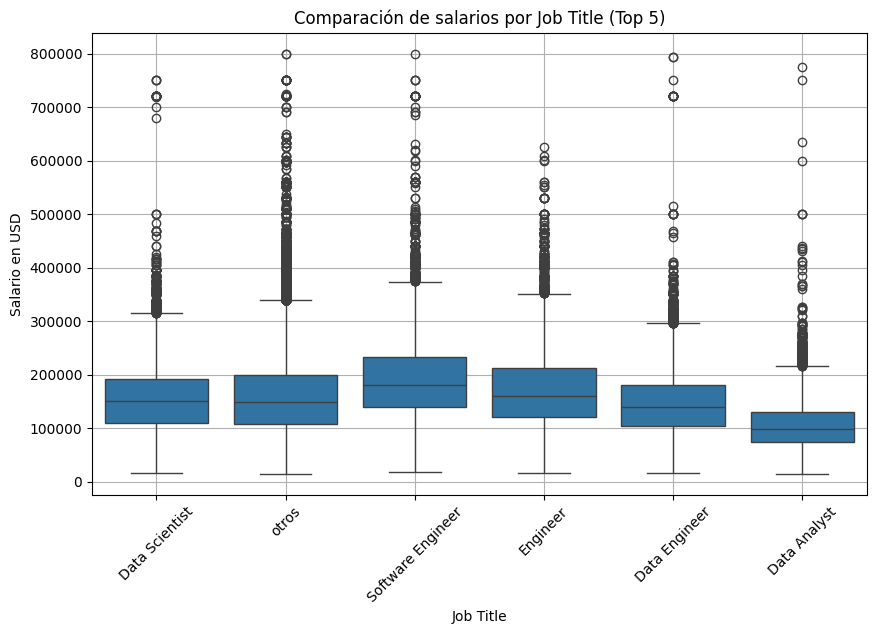

In [139]:
#Comparación salarios según job title (usar las 5 categorías más repetidas)
top_5 = df['job_title'].value_counts().nlargest(5).index

df['job_title_agrupada'] = df['job_title'].apply(lambda x: x if x in top_5 else 'otros')

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='job_title_agrupada', y='salary_in_usd')
plt.title('Comparación de salarios por Job Title (Top 5)')
plt.xlabel('Job Title')
plt.ylabel('Salario en USD')
plt.xticks(rotation=45)
plt.grid(True)

¿Cómo afecta el nivel de experiencia al salario?

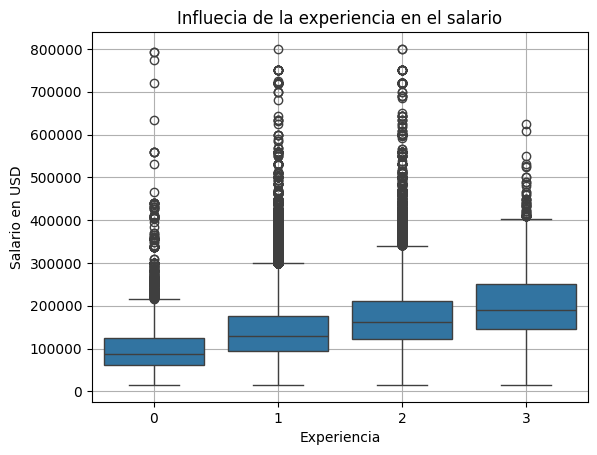

In [140]:
#plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='experience_level_num', y='salary_in_usd')
plt.title('Influecia de la experiencia en el salario')
plt.xlabel('Experiencia')
plt.ylabel('Salario en USD')
plt.grid(True)

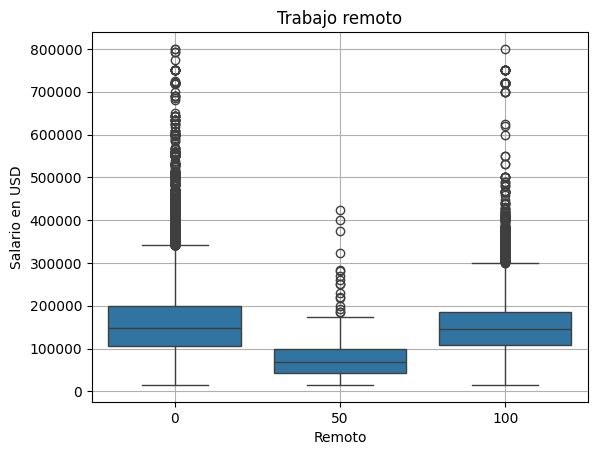

In [141]:
sns.boxplot(data=df, x='remote_ratio', y='salary_in_usd')
plt.title('Trabajo remoto')
plt.xlabel('Remoto')
plt.ylabel('Salario en USD')
plt.grid(True)

A simple viste, el efecto, si existe, perjudica únicamente a los trabajos en modalidad 'híbrida'.

##5 - Modelado
- Predicción de salarios según características

- Modelo lineal: Todas las variables incluidas en el modelo son significativas al 99%.
Se observa un fuerte efecto de los outliers en rangos altos de salarios. Lo cual hace que el modelo falle en sus predicciones, especialmente al infravalorar los sueldos de rangos altos.  

- Modelo log-lineal: se corrige en gran medida el efecto de los outliers de la cola derecha. Sin embargo, al observar los residuos vemos que sigue habiendo un efecto sistemático (aunque leve) que no recoje el modelo. Estos errores no recogidos por el modelo se producen en las franjas de sueldos muy bajos y muy altos.

In [142]:
#Convertimos las variables bool en int para poder hacer la regresión
df = df.astype({col: int for col in df.select_dtypes(include='bool').columns})

In [143]:
variables_indep = columnas_dummies + ['experience_level_num', 'company_size_num', 'remote_ratio_num']

###Modelo Lineal (y,x)

In [144]:
x = df[variables_indep] #Variables explicativas
y = df['salary_in_usd'] #Variable dependiente

x = sm.add_constant(x)  #Añadimos constante

modelo = sm.OLS(y, x).fit() #Ajustamos modelo

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          salary_in_usd   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     2635.
Date:                Fri, 25 Jul 2025   Prob (F-statistic):               0.00
Time:                        19:49:02   Log-Likelihood:            -1.7124e+06
No. Observations:              136757   AIC:                         3.425e+06
Df Residuals:                  136743   BIC:                         3.425e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 4.281e+04   1609.052     26.605      0.000    3.97e+04     4.6e+04
Data Scientist       -5671.5014    563.852    -10.058      0.000   -6776.640   -4566.362
Software Engineer     2.349e+04    596.833     39.363      0.000    2.23e+04    2.47e+04
Data Engineer        -1.366e+04    599.121    -22.798      0.000   -1.48e+04   -1.25e+04
Data Analyst         -3.836e+04    658.621    -58.245      0.000   -3.97e+04   -3.71e+04
Engineer              5434.6823    721.222      7.535      0.000    4021.101    6848.264
US                    7.654e+04   1069.993     71.532      0.000    7.44e+04    7.86e+04
CA                    4.573e+04   1383.853     33.048      0.000     4.3e+04    4.84e+04
GB                    2.089e+04   1504.788     13.884      0.000    1.79e+04    2.38e+04
AU                    5.643e+04   3081.320     18.314      0.000    5.04e+04    6.25e+04
NL                    7351.9901   3426.773      2.145      0.032     635.579    1.41e+04
experience_level_num   2.78e+04    267.405    103.972      0.000    2.73e+04    2.83e+04
company_size_num      5373.6437   1085.898      4.949      0.000    3245.304    7501.983
remote_ratio_num     -4686.6134    222.872    -21.028      0.000   -5123.439   -4249.788
==============================================================================
Omnibus:                    54761.722   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           426624.639
Skew:                           1.735   Prob(JB):                         0.00
Kurtosis:                      10.927   Cond. No.                         48.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1. 📊 Importancia / efecto de cada variable (coeficientes del modelo)

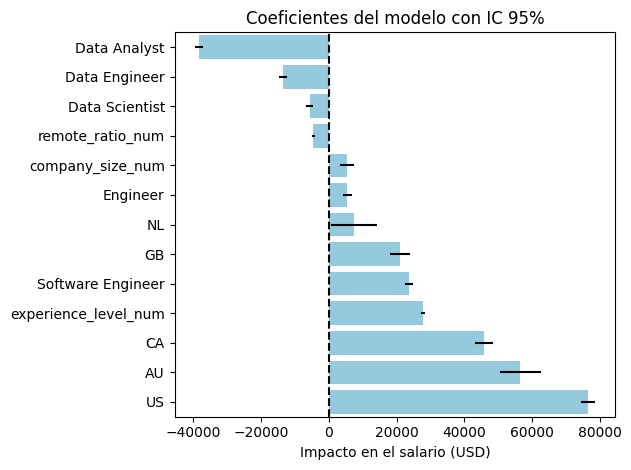

In [145]:
# 'modelo' es el resultado de sm.OLS(y, X).fit()
coeficientes = modelo.params.drop('const')  # Quitamos la constante
errores = modelo.bse.drop('const')          # Error estándar

# Convertimos en DataFrame ordenado
df_coef = pd.DataFrame({
    'coef': coeficientes,
    'err': errores
}).sort_values('coef')

# Gráfico de barras horizontales con intervalo de confianza ± 1.96*error
#plt.figure(figsize=(10, 8))
sns.barplot(x='coef', y=df_coef.index, data=df_coef, orient='h', color='skyblue', xerr=1.96*df_coef['err'])
plt.axvline(0, color='black', linestyle='--')
plt.title('Coeficientes del modelo con IC 95%')
plt.xlabel('Impacto en el salario (USD)')
plt.ylabel('')
plt.tight_layout()

2. 📈 Valor real vs valor predicho (buen indicador del ajuste general)

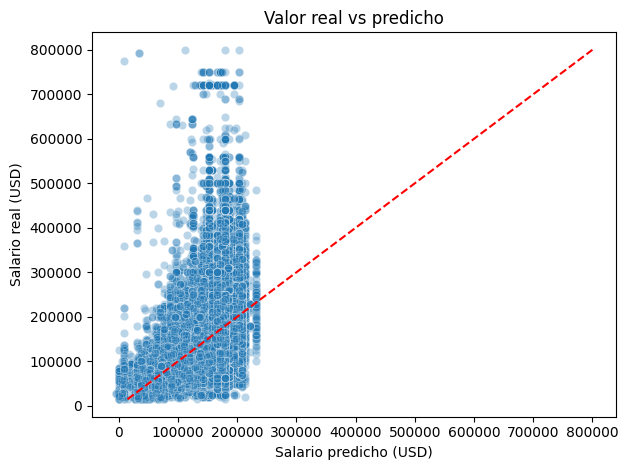

In [146]:
# y: variable real, modelo.fittedvalues: predicha
#plt.figure(figsize=(6, 6))
sns.scatterplot(x=modelo.fittedvalues, y=y, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')  # Línea ideal
plt.xlabel('Salario predicho (USD)')
plt.ylabel('Salario real (USD)')
plt.title('Valor real vs predicho')
plt.tight_layout()

3. 📉 Residuos (diagnóstico del modelo)

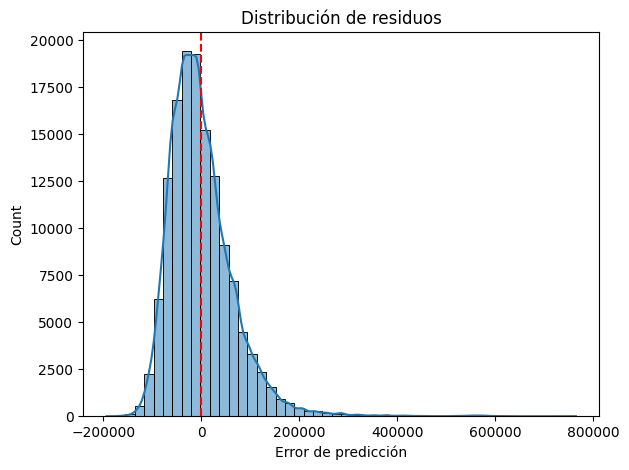

In [147]:
residuos = y - modelo.fittedvalues

#plt.figure(figsize=(6, 4))
sns.histplot(residuos, bins=50, kde=True)
plt.axvline(0, color='red', linestyle='--')
plt.title('Distribución de residuos')
plt.xlabel('Error de predicción')
plt.tight_layout()
plt.savefig('residuos.png')

Los residuos del modelo están bastante centrados pero tiene asimetría hacia la derecha lo que viene a indicar una infravaloración de salarios altos por parte del modelo.

Probablemente sea debido al gran número de outliers en la cola derecha de la distribución de salarios.

Para reducir la influencia en el modelo de este sesgo a la derecha en el siguiente modelo trasformaremos la variable dependiente en logaritmos.

###Modelo log-lineal (log(y),x)

In [148]:
#Variables explicativas (x) ya definidas anteriormente
log_y = np.log(df['salary_in_usd']) #Variable dependiente

x = sm.add_constant(x)  #Añadimos constante

modelo = sm.OLS(log_y, x).fit() #Ajustamos modelo

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          salary_in_usd   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     4767.
Date:                Fri, 25 Jul 2025   Prob (F-statistic):               0.00
Time:                        19:49:04   Log-Likelihood:                -70003.
No. Observations:              136757   AIC:                         1.400e+05
Df Residuals:                  136743   BIC:                         1.402e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   10.7283      0.010   1095.448      0.000      10.709      10.747
Data Scientist          -0.0111      0.003     -3.239      0.001      -0.018      -0.004
Software Engineer        0.1553      0.004     42.754      0.000       0.148       0.162
Data Engineer           -0.0617      0.004    -16.925      0.000      -0.069      -0.055
Data Analyst            -0.2667      0.004    -66.523      0.000      -0.275      -0.259
Engineer                 0.0388      0.004      8.832      0.000       0.030       0.047
US                       0.8160      0.007    125.297      0.000       0.803       0.829
CA                       0.6124      0.008     72.708      0.000       0.596       0.629
GB                       0.2896      0.009     31.615      0.000       0.272       0.308
AU                       0.7165      0.019     38.204      0.000       0.680       0.753
NL                       0.2032      0.021      9.740      0.000       0.162       0.244
experience_level_num     0.2155      0.002    132.392      0.000       0.212       0.219
company_size_num         0.0523      0.007      7.912      0.000       0.039       0.065
remote_ratio_num        -0.0243      0.001    -17.888      0.000      -0.027      -0.022
==============================================================================
Omnibus:                     1709.633   Durbin-Watson:                   1.856
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3119.329
Skew:                           0.011   Prob(JB):                         0.00
Kurtosis:                       3.740   Cond. No.                         48.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

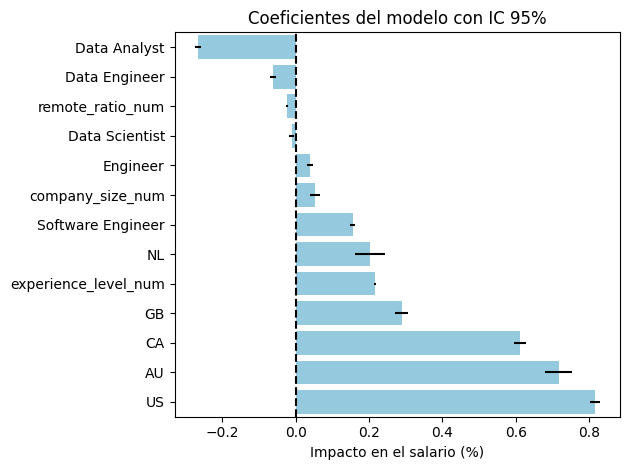

In [149]:
# 'modelo' es el resultado de sm.OLS(log_y, X).fit()
coeficientes = modelo.params.drop('const')  # Quitamos la constante
errores = modelo.bse.drop('const')          # Error estándar

# Convertimos en DataFrame ordenado
df_coef = pd.DataFrame({
    'coef': coeficientes,
    'err': errores
}).sort_values('coef')

# Gráfico de barras horizontales con intervalo de confianza ± 1.96*error
#plt.figure(figsize=(10, 8))
sns.barplot(x='coef', y=df_coef.index, data=df_coef, orient='h', color='skyblue', xerr=1.96*df_coef['err'])
plt.axvline(0, color='black', linestyle='--')
plt.title('Coeficientes del modelo con IC 95%')
plt.xlabel('Impacto en el salario (%)')
plt.ylabel('')
plt.tight_layout()

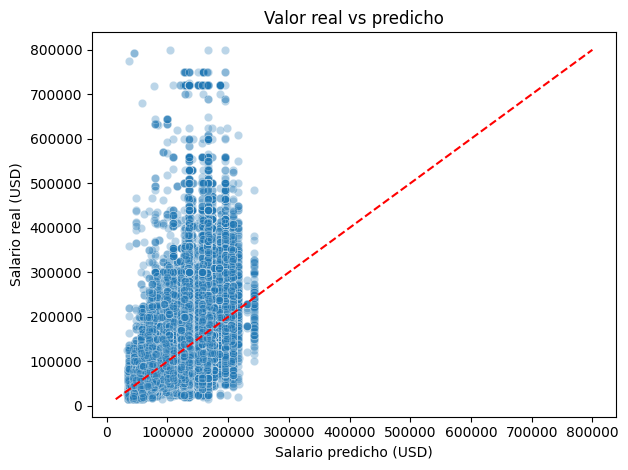

In [150]:
# Comparar salario real vs predicho (ambos en dólares)
y_real = y
y_pred = np.exp(modelo.fittedvalues)

sns.scatterplot(x=y_pred, y=y_real, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')  # Línea ideal
plt.xlabel('Salario predicho (USD)')
plt.ylabel('Salario real (USD)')
plt.title('Valor real vs predicho')
plt.tight_layout()

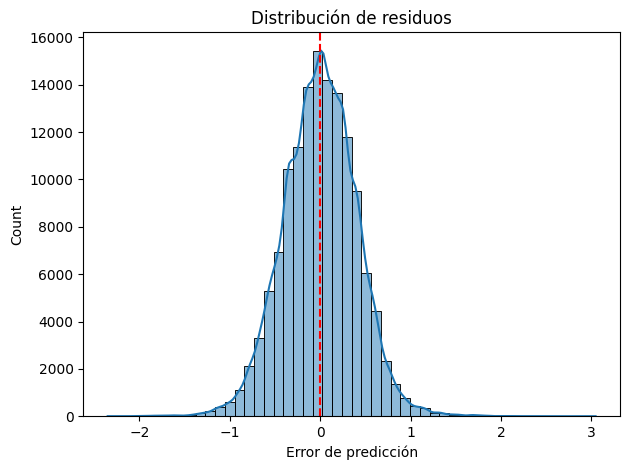

In [151]:
residuos = log_y - modelo.fittedvalues

#plt.figure(figsize=(6, 4))
sns.histplot(residuos, bins=50, kde=True)
plt.axvline(0, color='red', linestyle='--')
plt.title('Distribución de residuos')
plt.xlabel('Error de predicción')
plt.tight_layout()
plt.savefig('residuos_2.png')

La transformación logarítmica ha compactado los valores altos, estabilizando la varianza y mejorando el ajuste lineal global.

Se ha resuelto el problema de heterocedasticidad (varianza creciente).

¿Son estos residuos ruido aleatorio, es decir, errores no sistemáticos?

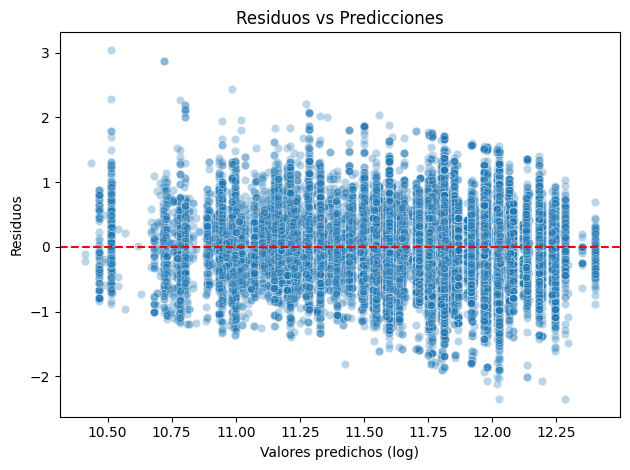

In [152]:
sns.scatterplot(x=modelo.fittedvalues, y=modelo.resid, alpha=0.3)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valores predichos (log)')
plt.ylabel('Residuos')
plt.title('Residuos vs Predicciones')
plt.tight_layout()
plt.savefig('residuosVsPredicciones')

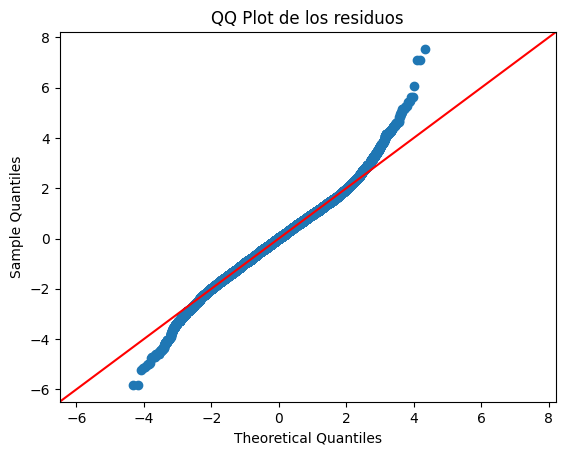

In [153]:
sm.qqplot(modelo.resid, line='45', fit=True)
plt.title("QQ Plot de los residuos")
plt.savefig('qqplot.png')

In [154]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.api import add_constant

X = add_constant(df[['experience_level_num', 'remote_ratio_num']])  # usa tus variables
test = het_breuschpagan(modelo.resid, X)

labels = ['LM Stat', 'LM p-value', 'F Stat', 'F p-value']
print(dict(zip(labels, test)))


{'LM Stat': np.float64(1374.5627006664338), 'LM p-value': np.float64(3.292319962354847e-299), 'F Stat': np.float64(694.2442140826456), 'F p-value': np.float64(1.0325510718979169e-300)}


el p-value del test breuschpagan muestra evidencia estadística de heterocedasticidad en los residuos.

##6 - Conclusiones

Se construyó un modelo de regresión lineal multivariante con salary_in_usd como variable dependiente.

Posteriormente se mejoró el ajuste mediante un modelo log-lineal, utilizando log(salary_in_usd) como variable objetivo:

R² del modelo mejoró considerablemente, pasando de ~0.20 a ~0.31, aunque aún hay factores importantes que el modelo no captura, esto es normal en modelos sobre salarios donde influye mucho cuestiones muy particulares como la capacidad negociadora.

Sobre la variable "Job Title": se observa que el rol de Software Engineer	correlaciona muy positivamente con el salario mientras que el rol de Data Analyst	es uno de los pero pagados.

Se observa un sesgo geográfico en salarios muy importante, lo cual confirma que este mercado laboral aún no se ha globalizado.
El efecto positivo de USA de un +81.6% es remarcable.

Como era previsible, el efecto de la experiencia es positivo, al igual que el del tamaño de la empresa, aunque en menos medida.

El efecto del trabajo remoto es probablemente el más dificil de interpretar (-2.43%). En la visualización de esta variable vimos como el que realmente afectaba al salario era el primer salto. Es posible que haya un problema de multicolinealidad con esta variable al ser un efecto geográfico más que de penetración del trabajo remoto (países con mayor remoto y con menores salarios). En cualquier caso el efecto de esta variable no parece muy reseñable.

En cuanto a los residuos del modelo:

Durbin-Watson ≈ 1.85 → no hay autocorrelación de residuos.

Skew = 0.011, Kurtosis = 3.74 → distribución de residuos razonablemente normal.

Omnibus y JB tests → aún detectan algo de asimetría, pero el gráfico de residuos confirmó buen comportamiento.

La distribución de residuos mostró mayor simetría y ausencia de sesgo sistemático.

El análisis gráfico de residuos sugiere que el error residual se comporta de forma razonablemente aleatoria.

El test de Breusch-Pagan indicó cierta heterocedasticidad estadísticamente significativa, aunque no crítica a nivel práctico.

Se recomienda, para mayor robustez, utilizar errores estándar robustos en análisis inferenciales.

Próximos pasos:

Explorar modelos no lineales o no paramétricos (árboles, random forest, XGBoost)